In [99]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import pickle
import datetime

# Books

In [2]:
df = pd.read_parquet('book_user_2015_20.parquet', engine='pyarrow')

In [5]:
df.shape

(1777863, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777863 entries, 0 to 1777862
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int16 
 1   verified        bool  
 2   reviewerID      object
 3   asin            object
 4   style           object
 5   reviewText      object
 6   summary         object
 7   unixReviewTime  int32 
dtypes: bool(1), int16(1), int32(1), object(5)
memory usage: 79.7+ MB


In [7]:
df.head()

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime
0,5,True,AVP0HXC9FG790,0001713353,None,The kids loved it!,Five Stars,1466380800
1,5,False,A2RE7WG349NV5D,0001713353,"{'Color:': None, 'Format:': ' Paperback', 'Pac...",LOVE IT,Five Stars,1436400000
2,5,True,A2CVLIZ9ELU88,0001061240,"{'Color:': None, 'Format:': ' Hardcover', 'Pac...",I had this book as a child and loved it. The c...,A wonderful poetry collection with superior co...,1475712000
3,5,True,A3LAQSHW9IVKUO,0002005263,"{'Color:': None, 'Format:': ' Mass Market Pape...","Typical Hillerman, the only mystery set in mod...",You will want to take notes,1478390400
4,5,True,A2B4R7L8FX9BGT,0002005263,"{'Color:': None, 'Format:': ' Kindle Edition',...",Love it.,Five Stars,1452297600


# datetime -형식 변환

In [20]:
df['timestamp'] = df['unixReviewTime'].apply(lambda x : datetime.date.fromtimestamp(x))

In [22]:
df.drop('unixReviewTime',axis=1,inplace=True)

In [29]:
df['year'] = df['timestamp'].apply(lambda x : x.year)
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['date'] = df['timestamp'].apply(lambda x : x.weekday())

In [62]:
# year랑 month 합침
df['year_month'] = df.apply(lambda x : str(x['year'])+'_'+str(x['month']) if x['month']>=10 
                            else str(x['year'])+'_0'+str(x['month']),axis=1)

### year

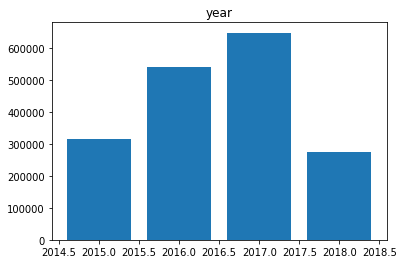

In [68]:
word = 'year'
df_feature_vc = df[word].value_counts()
plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.show()

### month

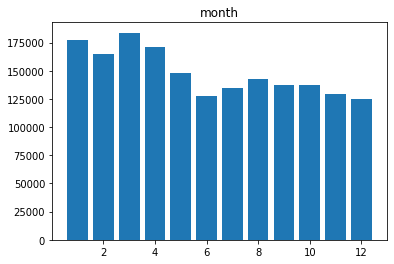

In [57]:
word = 'month'
df_feature_vc = df[word].value_counts()
plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.show()

### year_month - 계속 증가하는 추세인데, 2018년 5월부터 데이터가 이상함. 2018년 4월까지만 사용하는 것도 고려

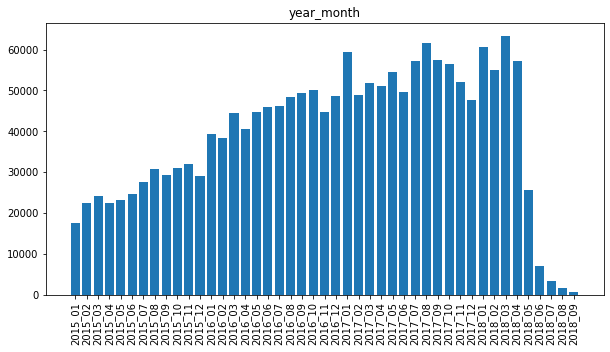

In [63]:
word = 'year_month'
plt.figure(figsize=(10,5))
df_feature_vc = df[word].value_counts()
# 인덱스 정렬
df_feature_vc = df_feature_vc.sort_index()

plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.xticks(rotation =90)
plt.show()

### date

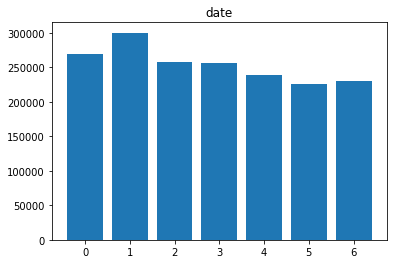

In [69]:
# 5,6 이 주말
word = 'date'
df_feature_vc = df[word].value_counts()
plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.show()

## overall

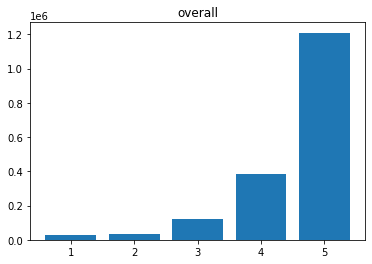

In [71]:
word = 'overall'
df_feature_vc = df[word].value_counts()
plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.show()

## verified

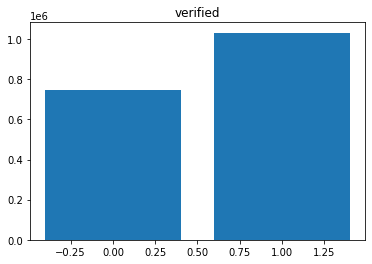

In [72]:
word = 'verified'
df_feature_vc = df[word].value_counts()
plt.bar(df_feature_vc.index, df_feature_vc)
plt.title(f'{word}')
plt.show()

## reviewerID

In [74]:
df.reviewerID.nunique()

39270

## asin

In [75]:
df.asin.nunique()

419129

### user 별 item

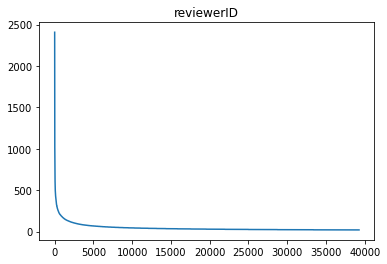

In [90]:
word = 'reviewerID'
df_feature_vc = df.groupby('reviewerID')['asin'].count().sort_values(ascending=False)
plt.plot([i for i in range(len(df_feature_vc))], df_feature_vc)
plt.title(f'{word}')
plt.show()

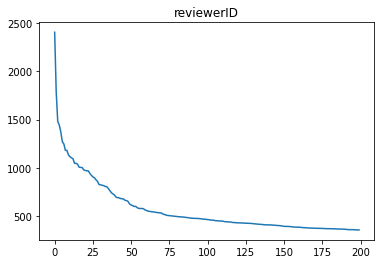

In [126]:
word = 'reviewerID'
df_feature_vc = df.groupby('reviewerID')['asin'].count().sort_values(ascending=False)[:200]
plt.plot([i for i in range(len(df_feature_vc))], df_feature_vc)
plt.title(f'{word}')
plt.show()

In [127]:
# 100명 이하 정도만 500권 이상 리뷰 남김
df.groupby('reviewerID')['asin'].count().sort_values(ascending=False)[100:101]

reviewerID
A36OTZP3JUZSYB    463
Name: asin, dtype: int64

In [134]:
df.groupby('reviewerID')['asin'].count().describe()

count    39270.000000
mean        45.272804
std         57.262493
min         20.000000
25%         23.000000
50%         29.000000
75%         45.000000
max       2407.000000
Name: asin, dtype: float64

### item 별 user

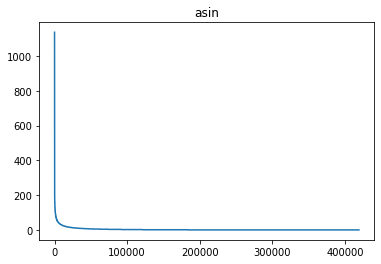

In [136]:
word = 'asin'
df_feature_vc = df.groupby('asin')['reviewerID'].count().sort_values(ascending=False)
plt.plot([i for i in range(len(df_feature_vc))], df_feature_vc)
plt.title(f'{word}')
plt.show()

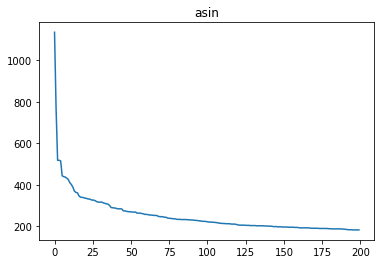

In [137]:
word = 'asin'
df_feature_vc = df.groupby('asin')['reviewerID'].count().sort_values(ascending=False)[:200]
plt.plot([i for i in range(len(df_feature_vc))], df_feature_vc)
plt.title(f'{word}')
plt.show()

In [138]:
# 100권 이하 정도만 200명 이상 리뷰 남김
df.groupby('asin')['reviewerID'].count().sort_values(ascending=False)[100:101]

asin
0062409883    221
Name: reviewerID, dtype: int64

In [141]:
df.groupby('asin')['reviewerID'].count().describe()

count    419129.000000
mean          4.241804
std          11.507266
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1136.000000
Name: reviewerID, dtype: float64

### overall 별 verified 분포 - 별점 4점 준 사람 중에선 책 구매 안한 사람이 조금 더 많음

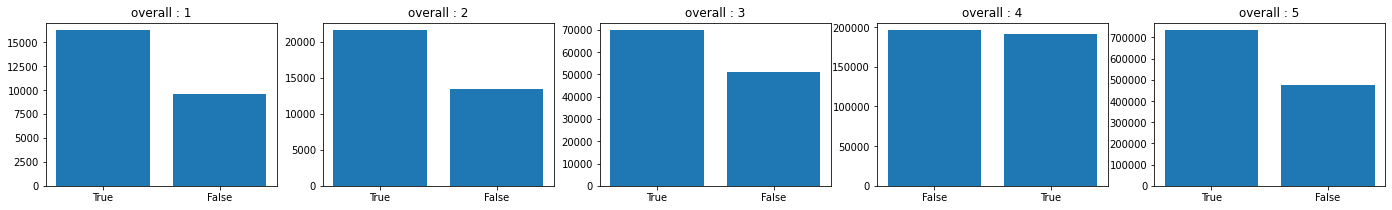

In [194]:
f, axes = plt.subplots(1, 5)
f.set_size_inches((24, 3))
for i in range(5):
    df_feature_vc = df.groupby('overall').verified.value_counts().loc[i+1]
    axes[i].bar([str(i) for i in df_feature_vc.index], df_feature_vc)
    axes[i].set_title(f'overall : {i+1}', fontsize = 12)
    # f.suptitle('overall_verified', fontsize = 15)
plt.show()

### style

In [211]:
key_list = []
for i in df['style']:
    if i:
        for key in i:
            if key not in key_list:
                key_list.append(key)

In [212]:
for key in key_list:
    df[key] = df['style'].apply(lambda x : x[key] if x else None)

In [274]:
df['style'].iloc[1]

{'Color:': None,
 'Format:': ' Paperback',
 'Package Quantity:': None,
 'Size:': None,
 'Style Name:': None,
 'Style:': None}

In [227]:
# Format만 정상
for i in key_list:
    print(i)
    print(sum(df[i].isna()) / len(df))

Color:
0.9999409403311729
Format:
0.02162596330538405
Package Quantity:
0.9999915629044532
Size:
0.9999797509706878
Style Name:
0.999994937742672
Style:
0.9999988750539271


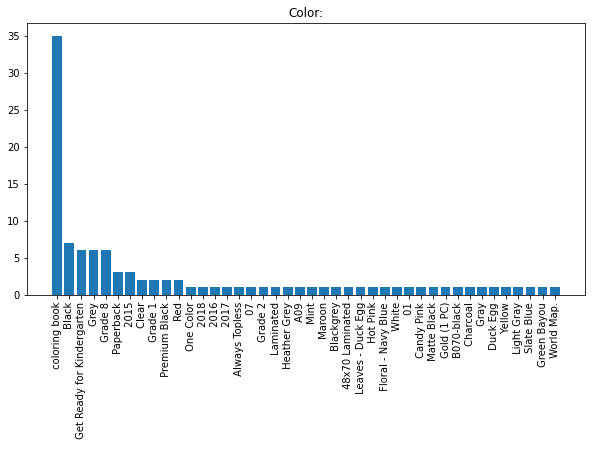

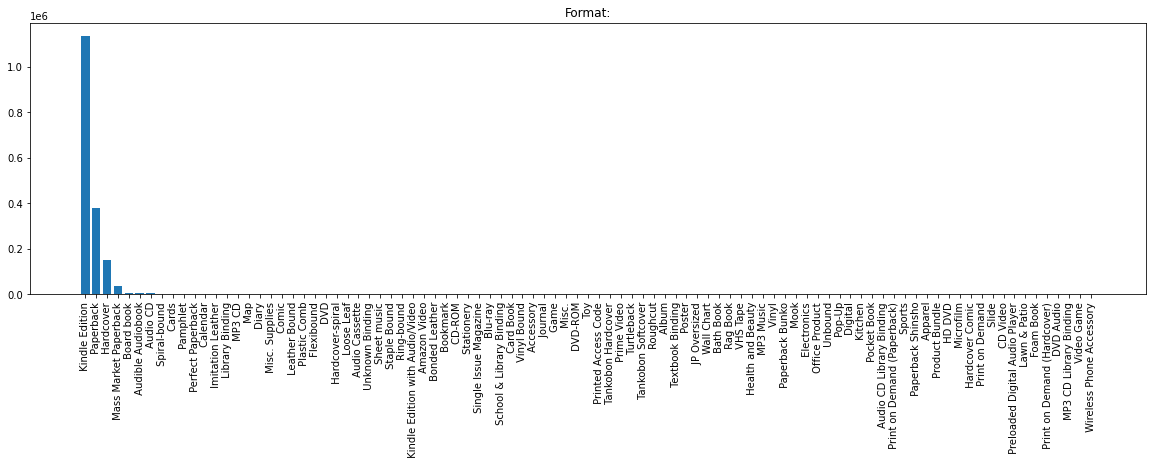

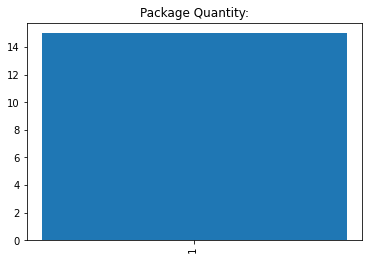

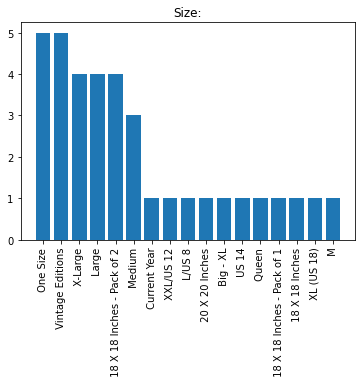

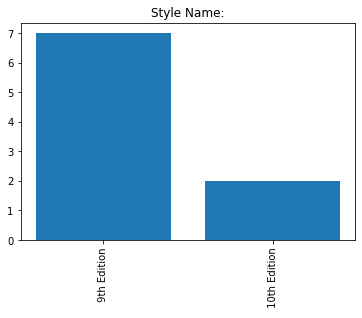

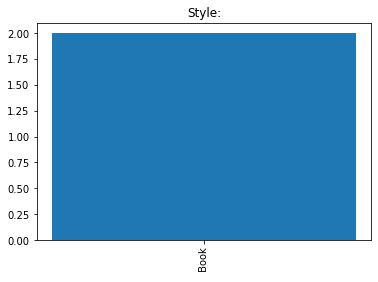

In [219]:
for key in key_list:
    word = key
    df_feature_vc = df[word].value_counts()
    if key =='Color:':
        plt.figure(figsize=(10,5))
    elif key == 'Format:':
        plt.figure(figsize=(20,5))
    plt.bar(df_feature_vc.index, df_feature_vc)
    plt.xticks(rotation =90)
    plt.title(f'{word}')
    plt.show()

In [250]:
df['Format:'].value_counts()[:15]

 Kindle Edition           1137457
 Paperback                 379626
 Hardcover                 149093
 Mass Market Paperback      35691
 Board book                  7478
 Audible Audiobook           5079
 Audio CD                    4510
 Spiral-bound                3499
 Cards                       2546
 Pamphlet                    1365
 Perfect Paperback           1151
 Calendar                    1145
 Imitation Leather            900
 Library Binding              894
 MP3 CD                       743
Name: Format:, dtype: int64

In [252]:
df[df['Format:']==df['Format:'].value_counts().index[0]].head(3)

,overall,verified,reviewerID,asin,style,reviewText,summary,timestamp,year,month,date,year_month,Color:,Format:,Package Quantity:,Size:,Style Name:,Style:
4,5,True,A2B4R7L8FX9BGT,0002005263,"{'Color:': None, 'Format:': ' Kindle Edition',...",Love it.,Five Stars,2016-01-09,2016,1,5,2016_01,None,Kindle Edition,None,None,None,None
19,3,False,ALUGXJE8QRTT8,0001384198,"{'Color:': None, 'Format:': ' Kindle Edition',...",We recently joined Dolly Partons Imagination L...,I didn't enjoy it at all.,2016-06-29,2016,6,2,2016_06,None,Kindle Edition,None,None,None,None
29,3,True,A1R4J2PO30SJ8Q,0001381733,"{'Color:': None, 'Format:': ' Kindle Edition',...",like it,Three Stars,2017-06-15,2017,6,3,2017_06,None,Kindle Edition,None,None,None,None


In [255]:
df[df['Format:']==df['Format:'].value_counts().index[14]].head(3)

,overall,verified,reviewerID,asin,style,reviewText,summary,timestamp,year,month,date,year_month,Color:,Format:,Package Quantity:,Size:,Style Name:,Style:
1908,5,True,A19431QXHJKE5T,0006172768,"{'Color:': None, 'Format:': ' MP3 CD', 'Packag...",Ok,Five Stars,2016-08-22,2016,8,0,2016_08,None,MP3 CD,None,None,None,None
2135,4,True,AABB9CW9VTI4,0006281141,"{'Color:': None, 'Format:': ' MP3 CD', 'Packag...","Hard to listen too not because it isn't good, ...",Deep truth,2017-08-21,2017,8,0,2017_08,None,MP3 CD,None,None,None,None
3694,5,True,A2UGS1STG2SY3H,0007145632,"{'Color:': None, 'Format:': ' MP3 CD', 'Packag...",Absolutely great.,Five Stars,2016-03-06,2016,3,6,2016_03,None,MP3 CD,None,None,None,None


# summary

In [231]:
df.summary.nunique() 

901519

# reviewText

In [233]:
df.reviewText.nunique() 

1479242

### 1등 책 - asin 정보가 amazon에서 검색이 안됨

In [350]:
sort_popular_asin[:5]

['B001MVNGCU', '038568231X', '0439023521', '8184776217', '0996135669']

In [351]:
# title도 이상함
mb[mb.asin=='B001MVNGCU']

,category,description,title,brand,price,asin
1409928,"['Books', 'Cookbooks, Food & Wine', 'Regional ...",['<b>Praise for Julia Child and&#160;<i>Master...,"Books"" />",Visit Amazon's Julia Child Page,$53.88,B001MVNGCU


In [352]:
mb[mb.asin=='B001MVNGCU'].description.iloc[0]

"['<b>Praise for Julia Child and&#160;<i>Mastering the Art of French Cooking<br></i></b><br>&ldquo;Julia Child paved the way for Chez Panisse and so many others by demystifying French food and by reconnecting pleasure and delight with cooking and eating at the table. She brought forth a culture of American ingredients and gave us all the confidence to cook with them in the pursuit of flavor.&rdquo; &mdash;Alice Waters, Chez Panisse<br><br>&ldquo;<i>Mastering the Art of French Cooking</i>&#160;was one of my first introductions to my foundation of understanding the art of French cooking. The combination of reading Julia&rsquo;s book, working in the kitchen, and watching her television shows helped lead me to my beginnings in serious cuisine. Julia is . . . the grande dame of cooking, who has touched all of our lives with her immense respect and appreciation of cuisine.&rdquo; &mdash;Emeril Lagasse, Emeril&rsquo;s Restaurant<br><br>&ldquo;Julia has slowly but surely altered our way of thi

In [353]:
# 책 이름 : Mastering the Art of French Cooking  - 위에 책 설명을 찾음

### 아래 예시처럼 같은 사람이 같은 날, 같은 리뷰를 남겼는데, asin이 다름 
### asin이 다르지만 똑같은 책인가? 

In [340]:
a[a['reviewText'].str.contains('This book is essentially my Cooking Bible. As a chef, I can honestly say if you follow the recipes')].drop('style',axis=1).drop_duplicates()

,overall,verified,reviewerID,asin,reviewText,summary,timestamp,year,month,date,year_month,Color:,Format:,Package Quantity:,Size:,Style Name:,Style:
64800,5,True,AG2LPI0Q8REXC,0140461191,This book is essentially my Cooking Bible. As ...,The perfect book,2016-01-04,2016,1,0,2016_01,None,Hardcover,None,None,None,None
1185465,5,True,AG2LPI0Q8REXC,B001MVNGCU,This book is essentially my Cooking Bible. As ...,The perfect book,2016-01-04,2016,1,0,2016_01,None,Hardcover,None,None,None,None


# drop 전처리

In [356]:
df.drop([ 'style', 'year', 'month', 'date', 'year_month', 'Color:', 'Package Quantity:', 'Size:', 'Style Name:', 'Style:'],axis=1,inplace=True)

In [360]:
# 중복 데이터 제거
df = df.drop_duplicates()

## 위에 asin 다른데 리뷰 같은거 있어서, 밑에 예시로 다시 한번 확인

In [378]:
df[(~pd.isnull(df.reviewText))&(df.reviewText.str.contains('I Love this book! It is one of my favorites'))]

,overall,verified,reviewerID,asin,reviewText,summary,timestamp,Format:
78,5,True,A3A7TWFV9ZJYWN,0001720392,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,Hardcover
337,5,True,A3A7TWFV9ZJYWN,0001951076,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,None
3896,5,True,A3A7TWFV9ZJYWN,0007158459,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,Hardcover
4337,5,True,A3A7TWFV9ZJYWN,0007173156,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,Hardcover
11626,5,True,A3A7TWFV9ZJYWN,000766141X,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,Hardcover
151529,5,True,A3A7TWFV9ZJYWN,0375812156,I Love this book! It is one of my favorites fr...,I Love this book,2016-02-25,Hardcover


## 아래 보면 user, time, review 등 다 똑같은데 책이 다름 - 복붙해서 빠르게 리뷰 남겼거나.. 어쩄든 위에 1등 책 예시에서도 두 asin이 서로 다른 책일 가능성 있음 
## 지금처럼 asin이 다르면 다른 책이다 라고 가정하고 그냥 가는게 나을수도

In [382]:
mb[mb.asin.isin(df[(~pd.isnull(df.reviewText))&(df.reviewText.str.contains('I Love this book! It is one of my favorites'))].asin)]

,category,description,title,brand,price,asin
85,"['Books', ""Children's Books""]",['The Cat in the Hat Song Book by Dr. Seuss: 1...,Cat in the Hat Song Book,Visit Amazon's Dr. Seuss Page,$13.04,0001951076
1813,"['Books', ""Children's Books"", 'Literature & Fi...","['', 'Dr. Seuss ignites a childs imagination w...",The Cat in the Hat Comes Back: Green Back Book...,Visit Amazon's Dr. Seuss Page,$24.74,0007158459
1996,"['Books', ""Children's Books"", 'Classics']","[""From dreamy thoughts about colour to fantast...","Oh, the Thinks You Can Think! Green Back Book",Visit Amazon's Dr. Seuss Page,$7.03,0007173156
120012,"['Books', ""Children's Books"", 'Literature & Fi...","[""They say a leopard can't change his spots-bu...",Put Me In the Zoo (Bright &amp; Early Board Bo...,Visit Amazon's Robert Lopshire Page,$4.99,0375812156


In [815]:
# mb2는 파일 밑 부분에서 불러온 것이기 때문에 밑 부분 먼저 실행하고 이거 실행하기
mb2[mb2.asin.isin(df[(~pd.isnull(df.reviewText))&(df.reviewText.str.contains('I Love this book! It is one of my favorites'))].asin)]

,category,description,title,brand,price,asin,imageURL,main_cat
107,"[Books, Children's Books, Classics]",[],Green Eggs and Ham,Visit Amazon's Dr. Seuss Page,$4.62,0001720392,[],Books
265,"[Books, Children's Books]",[The Cat in the Hat Song Book by Dr. Seuss: 19...,Cat in the Hat Song Book,Visit Amazon's Dr. Seuss Page,$13.04,0001951076,[],Books
3797,"[Books, Children's Books, Literature & Fiction]","[, Dr. Seuss ignites a childs imagination with...",The Cat in the Hat Comes Back: Green Back Book...,Visit Amazon's Dr. Seuss Page,$24.74,0007158459,[],Books
4083,"[Books, Children's Books, Classics]",[From dreamy thoughts about colour to fantasti...,"Oh, the Thinks You Can Think! Green Back Book",Visit Amazon's Dr. Seuss Page,$7.03,0007173156,[],Books
6817,"[Books, Children's Books, Literature & Fiction]",[],Hop on Pop Classics HB,Visit Amazon's Dr. Seuss Page,$6.30,000766141X,[],Books
272853,"[Books, Children's Books, Literature & Fiction]",[They say a leopard can't change his spots-but...,Put Me In the Zoo (Bright &amp; Early Board Bo...,Visit Amazon's Robert Lopshire Page,$4.99,0375812156,[],Books


### 리뷰 길이

In [398]:
df['review_len'] = df['reviewText'].apply(lambda x: len(x) if x else None)

<ipython-input-398-904ae0cf6d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_len'] = df['reviewText'].apply(lambda x: len(x) if x else None)


In [402]:
df[~pd.isnull(df.review_len)].sort_values('review_len')

,overall,verified,reviewerID,asin,reviewText,summary,timestamp,Format:,review_len
1415790,4,True,A2IBHZWLKLGX5N,0802124496,A,Four Stars,2018-04-24,Hardcover,1.0
1454392,5,True,A3P6MVC4RGVLGH,0983943729,A,Five Stars,2016-12-24,Kindle Edition,1.0
1439741,5,True,A2FKPBCA1V60M7,0892214910,A,Five Stars,2016-11-18,Kindle Edition,1.0
1299101,5,True,A3P6MVC4RGVLGH,014751472X,A,Five Stars,2016-12-24,Paperback,1.0
84140,3,True,ABS82BYV0HQS2,0230735843,c,Three Stars,2016-05-30,Kindle Edition,1.0
...,...,...,...,...,...,...,...,...,...
898774,5,True,A1UJ8Y9KFMZ8Y3,1619491184,The Life of the Friars of the O.T.N. Way of Ch...,and who have let the ministers speak to them t...,2016-06-25,Paperback,29682.0
927819,5,False,A18RUTFPXZKMO8,1681857537,My 5-year-old great nephew and I were having s...,I would recommend,2016-05-25,Kindle Edition,29925.0
927458,5,False,A18RUTFPXZKMO8,1681854473,The product description is pretty much straigh...,Highly recommended,2016-05-25,Kindle Edition,29990.0
1254890,4,False,A18RUTFPXZKMO8,B00T0CNIS0,This eBook is okay. It contains 48 pages with ...,Like my other eBooks,2016-05-25,Kindle Edition,29999.0


# meta_Books - 이전에 전처리한 데이터

In [256]:
mb = pd.read_csv('meta_Books.csv')

In [258]:
mb.shape

(1422645, 6)

In [259]:
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422645 entries, 0 to 1422644
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   category     1422645 non-null  object
 1   description  1422645 non-null  object
 2   title        1422645 non-null  object
 3   brand        1422412 non-null  object
 4   price        1422645 non-null  object
 5   asin         1422645 non-null  object
dtypes: object(6)
memory usage: 65.1+ MB


In [260]:
mb.head()

,category,description,title,brand,price,asin
0,"['Books', 'Arts & Photography', 'Music']","['Discography of American Punk, Hardcore, and ...","Flex! Discography of North American Punk, Hard...",Burkhard Jarisch,$199.99,0000004545
1,"['Books', 'Education & Teaching', 'Schools & T...","['This book will alert, amuse and appall you a...",Double-Speak: From Revenue Enhancement to Term...,William Lutz,$198.70,0000038504
2,"['Books', 'Literature & Fiction', 'Dramas & Pl...",['William Shakespeare is widely regarded as th...,Love's Labour's Lost: Performed by Derek Jacob...,Visit Amazon's William Shakespeare Page,$20.93,0001050230
3,"['Books', ""Children's Books"", 'Literature & Fi...",['Collection of Poetry'],The golden treasury of poetry,Louis (ed) UNTERMEYER,$23.98,0001061240
4,"['Books', ""Children's Books"", 'Education & Ref...","['Sailing explores the world of small boats, i...",Sailing,Visit Amazon's Robin Knox-Johnston Page,$6.47,0001001787


## book, metabook asin 겹치는 거 확인

In [387]:
# 겹치는 정도 -> 이전에 전처리한 데이터는 너무 정보 없어져서 원본 사용해야함
len(set(df.asin).intersection(set(mb.asin))) / df.asin.nunique()

0.6367872421140031

# meta_books 원본 데이터와 비교

In [416]:
file = 'meta_Books.json'
mb2 = pd.read_json(file, lines=True)

In [417]:
mb2.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [404]:
mb.columns

Index(['category', 'description', 'title', 'brand', 'price', 'asin'], dtype='object')

In [418]:
# 원본 데이터에는 대부분의 정보 있음
len(set(df.asin).intersection(set(mb2.asin))) / df.asin.nunique()

0.9998663895841137

# join

In [421]:
mb2 = mb2[['category', 'description', 'title', 'brand', 'price', 'asin','imageURL','main_cat']]

In [816]:
merge_df = pd.merge(df,mb2,how='left',on='asin')

### imageurl 없고, 리뷰 데이터, 평점 순 asin 정렬한 것 뽑기

In [439]:
merge_df['imageurl'] = merge_df['imageURL'].apply(lambda x : 1 if x else 0)

In [455]:
image0_asin_df = merge_df[merge_df['imageurl']==0].groupby('asin')['reviewerID'].count().sort_values(ascending=False)

In [457]:
image0_asin_df = pd.DataFrame(image0_asin_df)

In [463]:
image0_asin_df2 = merge_df[merge_df['imageurl']==0].groupby('asin')['overall'].mean()

In [465]:
image0_asin_df = pd.merge(image0_asin_df,image0_asin_df2,how='left',on='asin')

In [476]:
sort_popular_asin_image0 = list(image0_asin_df.sort_values(['reviewerID','overall'],ascending=False).index)

In [477]:
with open("sort_popular_asin_image0.pickle","wb") as f:
    pickle.dump(sort_popular_asin_image0, f)

In [479]:
# imageurl 컬럼들은 none 값 너무 많으니 제거
merge_df.drop(['imageURL','imageurl'],axis=1,inplace=True)

### 중요해 보이는 컬럼 순으로 변경 

In [817]:
merge_df = merge_df[['reviewerID','asin',  'overall','title', 'verified',  'summary','reviewText','timestamp', 'description', 'price',
       'Format:',  'category',  'main_cat', 'brand']]

### nan 값, 빈 리스트들 None 값으로 통일해주기

In [818]:
merge_df['category'] = merge_df['category'].apply(lambda x : None if not x else None if type(x) != list and np.isnan(x) else x)
merge_df['description'] = merge_df['description'].apply(lambda x : None if not x else None if type(x) != list and np.isnan(x) else x)
merge_df['title'] = merge_df['title'].apply(lambda x : None if not x else None if type(x) != str and np.isnan(x) else x)
merge_df['brand'] = merge_df['brand'].apply(lambda x : None if not x else None if type(x) != str and np.isnan(x) else x)
merge_df['price'] = merge_df['price'].apply(lambda x : None if not x else None if type(x) != str and np.isnan(x) else x)
merge_df['main_cat'] = merge_df['main_cat'].apply(lambda x : None if not x else None if type(x) != str and np.isnan(x) else x)

### description 리스트 안에 있는 것 빼내기

In [819]:
merge_df['description'] = merge_df['description'].apply(lambda x : x[0] if x and type(x) == list else  x if x else None) 

### category 내부 확인

In [820]:
category_list = []

In [821]:
for i in merge_df['category']:
    if i:
        for j in i:
            category_list.append(j)

In [822]:
# category 내 값들이 너무 많아서 따로 빼기 어려움
len(set(category_list))

856

### price

In [823]:
merge_df['price'] = merge_df['price'].apply(lambda x : None if not x else x[1:] if x[0] == '$' else x) 

In [824]:
# price 내 문자나 긴 문장들이 섞여 있고, 1,024.25 같이 ',' 때문에 float으로 바뀌지 않는 경우가 있어서 아래와 같이 처리함

In [825]:
price_list = []
for i in merge_df['price']:
    # float 변경 안되는 문자들은 None으로 처리
    if i:
        # ',' 없애줌
        i = i.replace(',','')
        try:
            price_list.append(float(i))
        except:
            price_list.append(None)
    else:
        price_list.append(None)

In [826]:
merge_df['price'] = price_list

### price에 Nan이 있어서 혹시 문제가 발생할 수도 있음 (ex. db 저장할 때)

In [827]:
merge_df

,reviewerID,asin,overall,title,verified,summary,reviewText,timestamp,description,price,Format:,category,main_cat,brand
0,AVP0HXC9FG790,0001713353,5,"King, the Mice and the Cheese (Beginner Books)",True,Five Stars,The kids loved it!,2016-06-20,"THE KING, THE MICE AND THE CHEESE follows a fo...",12.33,None,"[Books, Children's Books, Literature & Fiction]",Books,Visit Amazon's Nancy Gurney Page
1,A2RE7WG349NV5D,0001713353,5,"King, the Mice and the Cheese (Beginner Books)",False,Five Stars,LOVE IT,2015-07-09,"THE KING, THE MICE AND THE CHEESE follows a fo...",12.33,Paperback,"[Books, Children's Books, Literature & Fiction]",Books,Visit Amazon's Nancy Gurney Page
2,A2CVLIZ9ELU88,0001061240,5,The golden treasury of poetry,True,A wonderful poetry collection with superior co...,I had this book as a child and loved it. The c...,2016-10-06,Collection of Poetry,23.98,Hardcover,"[Books, Children's Books, Literature & Fiction]",Books,Louis (ed) UNTERMEYER
3,A3LAQSHW9IVKUO,0002005263,5,The Sinister Pig,True,You will want to take notes,"Typical Hillerman, the only mystery set in mod...",2016-11-06,LARGE PRINT HARDBACK.,5.85,Mass Market Paperback,None,Books,Visit Amazon's Tony. Hillerman Page
4,A2B4R7L8FX9BGT,0002005263,5,The Sinister Pig,True,Five Stars,Love it.,2016-01-09,LARGE PRINT HARDBACK.,5.85,Kindle Edition,None,Books,Visit Amazon's Tony. Hillerman Page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773696,A36OTZP3JUZSYB,B01HJ56VC4,4,The Seance (Jinn Series Book 1) eBook,True,Very Nicely Done!,I really enjoyed this short story and Evelyn. ...,2017-06-24,None,NaN,Kindle Edition,"[Books, Literature & Fiction, Genre Fiction]",Buy a Kindle,Visit Amazon's Ayse Hafiza Page
1773697,A3KQ9BFVH82015,B01HJ56VC4,5,The Seance (Jinn Series Book 1) eBook,False,"I loved ""Seance"" by Ayse Hafiza","I loved ""Seance"" by Ayse Hafiza, it reminded m...",2017-06-17,None,NaN,Kindle Edition,"[Books, Literature & Fiction, Genre Fiction]",Buy a Kindle,Visit Amazon's Ayse Hafiza Page
1773698,AX9E9GSUYYPKS,B01HJ2RQGM,5,PLAYBOY MAGAZINE JULY/AUGUST 2016,True,Five Stars,No problems with seller or item,2016-07-17,"this product was never view, only taken out of...",11.75,None,"[Books, Literature & Fiction, Erotica]",Books,None
1773699,A28Q75F97EPZ2A,B01HJ6NAUY,3,The Lusca eBook,False,Squid,Not a bad story. Giant squid and it's eels com...,2017-08-05,None,NaN,Kindle Edition,"[Books, Literature & Fiction, Genre Fiction]",Buy a Kindle,Lisa R. Hazard


In [828]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773701 entries, 0 to 1773700
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   reviewerID   object 
 1   asin         object 
 2   overall      int16  
 3   title        object 
 4   verified     bool   
 5   summary      object 
 6   reviewText   object 
 7   timestamp    object 
 8   description  object 
 9   price        float64
 10  Format:      object 
 11  category     object 
 12  main_cat     object 
 13  brand        object 
dtypes: bool(1), float64(1), int16(1), object(11)
memory usage: 181.0+ MB


In [829]:
merge_df.to_csv('merge_book_2015_20.csv',index=False)